<a href="https://colab.research.google.com/github/as9786/ML-DLPratice/blob/main/DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random

import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt    

from tensorflow import keras

In [ ]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self,batch_size,csv_path,fold,image_size,mode='train',shuffle=True):
        self.batch_size = batch_size
        self.fold = fold
        self.mode = mode
        self.image_size = image_size
        self.shuffle = shuffle

        self.df = pd.read_csv(csv_path)

        if self.mode == 'train':
            self.df = self.df[self.df['fold'] != self.fold]
        elif self.mode == 'val':
            self.df = self.df[self.df['fold'] == self.fold]

        self.on_epoch_end()

    def __len__(self):
        return math.ceil(len(self.df) / self.batch_size) # batch_size로 안나눠지는것을 방지하기 위해 올림

    def __getitem__(self,idx):
        strt = idx * self.batch_size
        fin = (idx+1) * self.batch_size
        data = self.df.iloc[strt:fin]

        batch_x, batch_y = self.get_data(data)

        return np.array(batch_x), np.array(batch_y)
    
    def get_data(self,data):

        batch_x = []
        batch_y = []

        for _,r in data.iterrows():
            file_name = r['file_name'] 
            
            image = cv2.imread(f'/content/drive/MyDrive/oxford_pet/images/{file_name}.jpg')
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            
            image = cv2.resize(image,(self.image_size,self.image_size))
            image = image / 255.

            label = int(r['species']) - 1

            batch_x.append(image) 
            batch_y.append(label) 

        return batch_x, batch_y

    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)

In [ ]:
csv_path = '/content/drive/MyDrive/FastCampus/이미지처리/kfolds.csv'
train_generator = DataGenerator(
    batch_size=9,
    csv_path = csv_path,
    fold=1,
    image_size=256,
    mode='train',
    shuffle = True
)

In [ ]:
print(len(train_generator))

654


In [ ]:
(654*9)

5886

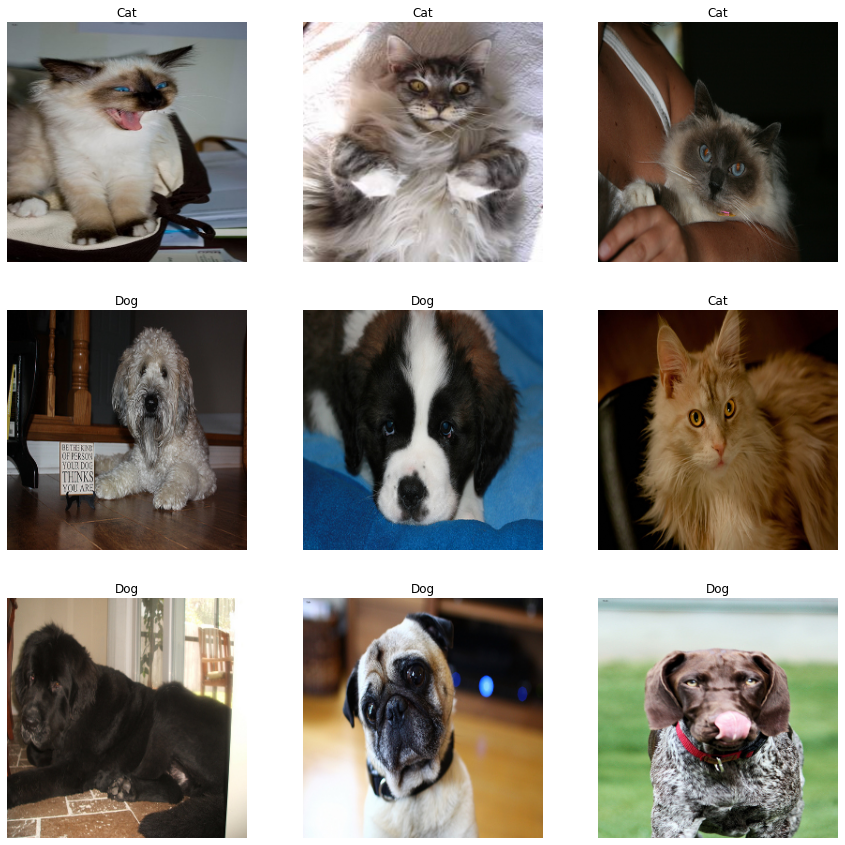

In [ ]:
class_name = ['Cat','Dog']

for batch in train_generator:
    X, y = batch
    plt.figure(figsize=(15,15))

    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(X[i])
        plt.title(class_name[y[i]])
        plt.axis('off')
    break